In [46]:
import re
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import spectrogram
import importlib
importlib.reload(spectrogram)
#index=0 for accuracy, 1 for F1 score
def get_data_list_from_line(line,index):
    splits=line.split(']')
    fold=splits[0].split(',')[0]
    noise_type=splits[0].split(',')[1]
    no_noise=splits[0].split(',')[-2:]
    no_noise_results=re.findall("\d+\.\d+",str(no_noise))   

    noise_results=[]
    noise_results.append(no_noise_results)
    for i in range(1,len(splits)):
        res=re.findall("\d+\.\d+",splits[i])
        if(len(res)==2):
            noise_results.append(res)
    noise_results=np.array(noise_results)

    values_list=[fold,noise_type]
    for x in list(noise_results[:,index]):
        values_list.append(float(x))
    return values_list

def get_noise_means(output_file):
    columns=['fold','noise']
    for SNR in range(-40,30,5):
            SNR=-1*SNR
            if(SNR==40):
                SNR='inf'
            columns.append(str(SNR))
    df = pd.DataFrame(columns = columns) 
    with open(output_file) as f:
        lines = f.readlines()
    for line in lines:
        #0 for acc, 1 for F1
        values_list=get_data_list_from_line(line,0)
        df.loc[len(df.index)]=values_list
    df=df.drop_duplicates(subset=['fold','noise'])
    noise_means=df.groupby(['noise']).mean()
    #append mean values of all noises to the dataframe
    mean_series=noise_means.mean()
    mean_series=mean_series.rename('means')
    noise_means=noise_means.append(mean_series)
    return noise_means

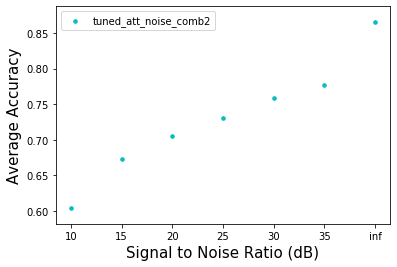

0.730607966457023


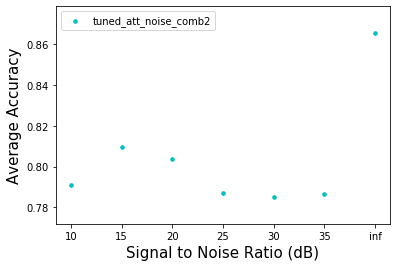

0.8040281521413597


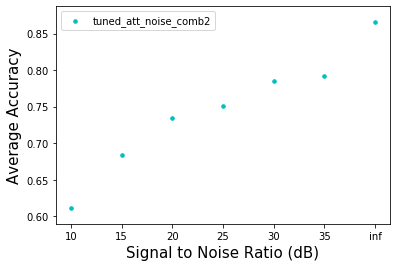

0.7463262453828491


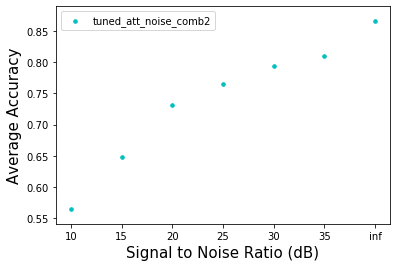

0.7396126584805829


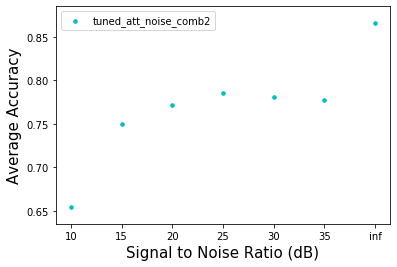

0.7692971947688928


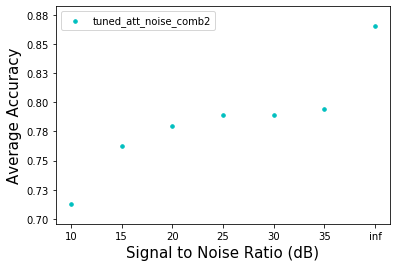

0.784616152540681


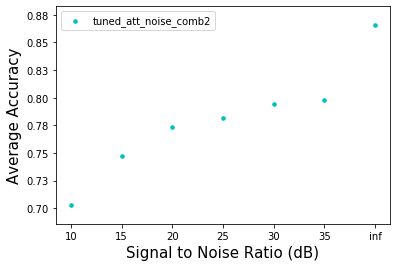

0.7804981531396625


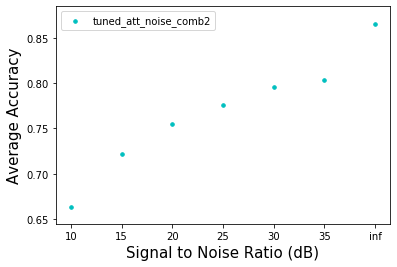

0.7687830687830689


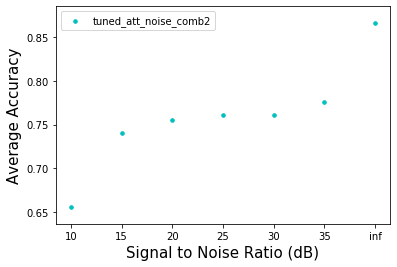

0.7591843865428771


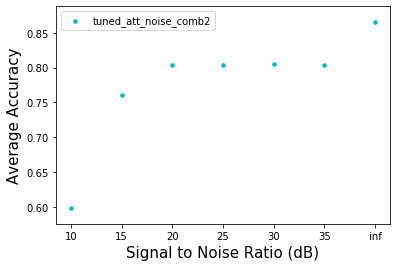

0.7774183887391433


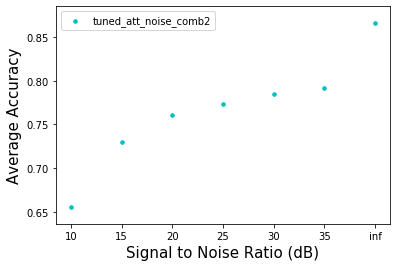

0.7660372366976141


In [47]:
from matplotlib.ticker import FormatStrFormatter
#compare best models
noise_names=['airconditioner','alarm','crickets','kettle','rain','steps','thunder','traffic','vacuum cleaner','white noise','mean']
'''
output_files=['/scratch/lnw8px/results/FCNN_results/side_comb_noise/random_noise_results.txt',
              '/scratch/lnw8px/results/all_FCNN/attention_models/noise_train/comb2/noise_results.txt',
              '/scratch/lnw8px/results/all_FCNN/noise_train/comb2/noise_results.txt']
'''
'''
paths to the text files where noise results are stored
noise result formant = 
fold,noise_name,[acc,F1 at SNR1],[acc,F1 at SNR2]....
fold,noise_name,[acc,F1 at SNR1],[acc,F1 at SNR2]....
....
...
'''
output_files=[#'/scratch/lnw8px/results/all_FCNN/mag/fft_75/noise_results.txt',
                #'/scratch/lnw8px/results/all_FCNN/comb1/fft_50/noise_results.txt',
                #'/scratch/lnw8px/results/all_FCNN/noise_train/mag/noise_results.txt',
              #'/scratch/lnw8px/results/all_FCNN/noise_train/MGD/noise_results.txt',
               #'/scratch/lnw8px/results/all_FCNN/noise_train/comb2/noise_results.txt',
                #'/scratch/lnw8px/results/all_FCNN/attention_models/noise_train/MGD/noise_results.txt',
                '/scratch/lnw8px/results/FCNN_results/side_comb_noise/random_noise_results.txt',
                #'/scratch/lnw8px/results/emo_db_batch/noise_results.txt'
                #'/scratch/lnw8px/results/RAVDESS/ignore_emo/no_1_7/noise_performance.txt'
             ]

noise_df_list=[]
for output_file in output_files:
    noise_df=get_noise_means(output_file)
    noise_df_list.append(noise_df)
noise_types=noise_df_list[0].index.values
noise_levels=noise_df_list[0].columns.values
noise_levels=noise_levels[0:7]

noise_names=['airconditioner','alarm','crickets','kettle','rain','steps','thunder','traffic','vacuum cleaner','white noise','mean']
for i,noise_type in enumerate(noise_types):
    values_list=[]
    for noise_df in noise_df_list:
        values=noise_df.loc[noise_type].values
        values=values[0:7]
        values_list.append(values)

    #x=np.array(list(range(-40,26,5)))*(-1)
    x=np.array(list(range(-40,-9,5)))*(-1)


    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(x, values_list[0], s=50, c='c', marker=".", label='tuned_att_noise_comb2')
    #ax1.scatter(x, values_list[1], s=10, c='b', marker="v", label='batch_tuned_att_noise_comb2')
    #ax1.scatter(x, values_list[2], s=10, c='r', marker="s", label='att_noise_MGD')
    #ax1.scatter(x, values_list[3], s=10, c='g', marker="o", label='tuned_att_noise_comb2')

    plt.legend(loc='upper left')
    locs, labels = plt.xticks()
    plt.xticks(x, noise_levels)
    plt.xlabel('Signal to Noise Ratio (dB)',fontsize=15)
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.ylabel('Average Accuracy',fontsize=15)
    #plt.title(noise_names[i],fontsize=20)
    fig.savefig('/scratch/lnw8px/results/all_FCNN/images/final_comp/tmp_batch_'+noise_type+'_acc.png', bbox_inches='tight', pad_inches=0.27)
    plt.show()
    print(np.mean(values_list[0]))


In [48]:
#compare best models
noise_names=['airconditioner','alarm','crickets','kettle','rain','steps','thunder','traffic','vacuum cleaner','white noise','mean']
output_files=[#'/scratch/lnw8px/results/all_FCNN/mag/fft_75/noise_results.txt',
              #'/scratch/lnw8px/results/all_FCNN/MGD/fft_50/noise_results.txt',
                #'/scratch/lnw8px/results/all_FCNN/phase/fft_75/noise_results.txt'
                #'/scratch/lnw8px/results/all_FCNN/comb1/fft_50/noise_results.txt',
               #'/scratch/lnw8px/results/all_FCNN/comb2/fft_25/noise_results.txt',
                #'/scratch/lnw8px/results/all_FCNN/noise_train/mag/noise_results.txt',
              '/scratch/lnw8px/results/all_FCNN/noise_train/MGD/noise_results.txt',
               '/scratch/lnw8px/results/all_FCNN/attention_models/noise_train/MGD/noise_results.txt',
              '/scratch/lnw8px/results/all_FCNN/noise_train/comb2/noise_results.txt',
               '/scratch/lnw8px/results/FCNN_results/side_comb_noise/random_noise_results.txt',
                #'/scratch/lnw8px/results/all_FCNN/noise_train/MGD/noise_results.txt',
               #'/scratch/lnw8px/results/all_FCNN/noise_train/comb2/noise_results.txt',
                #'/scratch/lnw8px/results/all_FCNN/attention_models/noise_train/MGD/noise_results.txt',
                #'/scratch/lnw8px/results/emo_db_batch/noise_results.txt',
                #'/scratch/lnw8px/results/RAVDESS/ignore_emo/no_1_7/noise_performance.txt'
              ]
noise_df_list=[]
for output_file in output_files:
    noise_df=get_noise_means(output_file)
    noise_df_list.append(noise_df)
noise_types=noise_df_list[0].index.values
noise_levels=noise_df_list[0].columns.values


noise_names=['air conditioner','alarm','crickets','kettle','rain','steps','thunder','traffic','vacuum cleaner','white noise','mean']
acc_list=[]
for i,noise_type in enumerate(noise_types):
    values_list=[]
    for noise_df in noise_df_list:
        values=noise_df.loc[noise_type].values
        values=values[0:7]
        mean_acc=np.mean(values)
        values_list.append(mean_acc)
    acc_list.append(values_list)
data=np.array(acc_list)

In [49]:
data[:,0]

array([0.66692123, 0.67997904, 0.66424079, 0.65779175, 0.67703404,
       0.68263951, 0.66905261, 0.66713088, 0.68315364, 0.68233503,
       0.67302785])

In [50]:
data[:,1]

array([0.68458121, 0.69065588, 0.68322352, 0.68102725, 0.68541479,
       0.70350903, 0.69159928, 0.68644804, 0.69551762, 0.67891584,
       0.68808925])

In [51]:
data[:,2]

array([0.69859738, 0.74586203, 0.71057203, 0.71498453, 0.72448837,
       0.71327743, 0.73227014, 0.7257662 , 0.71910752, 0.70878007,
       0.71937057])

In [52]:
data[:,3]

array([0.73060797, 0.80402815, 0.74632625, 0.73961266, 0.76929719,
       0.78461615, 0.78049815, 0.76878307, 0.75918439, 0.77741839,
       0.76603724])

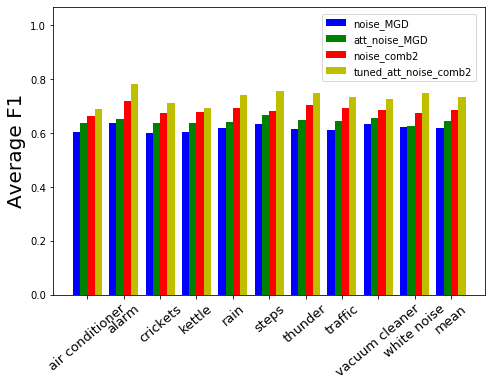

In [26]:
X = np.arange(11)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
width=0.2
#line1=ax.bar(X, data[:,0], color = 'b', width = width)
line1=ax.bar(X-0.3, data[:,0], color = 'b', width = width)
line2=ax.bar(X-0.1, data[:,1], color = 'g', width = width)
line3=ax.bar(X + 0.1, data[:,2], color = 'r', width = width)
line4=ax.bar(X + 0.3, data[:,3], color = 'y', width = width)
#line5=ax.bar(X + 0.25, data[:,4], color = 'y', width = 0.15)
#line6=ax.bar(X + 0.4, data[:,4], color = 'm', width = 0.15)

plt.ylim(0,1.07)
plt.xticks(np.arange(0, 1, step=0.1))  # Set label locations.
plt.xticks(np.arange(11), noise_names,rotation=40,fontsize=13)  # Set text labels.
ax.legend((line1,line2,line3,line4),('noise_MGD','att_noise_MGD','noise_comb2','tuned_att_noise_comb2'),loc='upper right', bbox_to_anchor=(0.99, 0.99))
plt.ylabel('Average F1',fontsize=20)
plt.show()
fig.savefig('/scratch/lnw8px/results/all_FCNN/images/final_models_compare_f1.png', bbox_inches='tight', pad_inches=0.27)

In [27]:
def get_vali_acc(model,data_list):
    iscorrect_list=[]
    pred_list=[]
    true_list=[]
    is_correct_list=[]
    for (data,label) in data_list:
        data=np.expand_dims(data,axis=0)
        if(data.shape[-1]>3):
            data=np.expand_dims(data,axis=-1)
        pred=model.predict(data)
        pred=np.argmax(pred)
        iscorrect=(pred==np.argmax(label))
        iscorrect_list.append(iscorrect)  
        
        pred_list.append(pred)
        true_list.append(np.argmax(label))
        is_correct_list.append(iscorrect)
        
    iscorrect_list=np.array(iscorrect_list)
    iscorrect_list.astype(int)
    iscorrect_list=iscorrect_list.astype(int)
    f1=f1_score(true_list,pred_list,average=None)
    return np.sum(iscorrect_list)/len(iscorrect_list),np.mean(f1),f1,[true_list,pred_list]

In [ ]:
#plot emotion wise F1 for RAVDESS
noise_files=['white_noise','crickets','alarm','kettle','rain','steps','thunder','traffic','vacume','airconditioner']
path='/scratch/lnw8px/results/RAVDESS/ignore_emo/no_1_7/'
means_list=[]
for noise in noise_files:
    noise_path=path+noise+'.npy'
    print(noise_path)
    ar=np.load(noise_path)
    #filter only the necessary SNRs
    ar=ar[0:7,:]
    means=np.mean(ar,axis=0)
    means_list.append(means)
means=np.array(means_list)
means=np.mean(means,axis=0)



In [86]:
means

array([0.85993348, 0.83838397, 0.75777965, 0.74056652, 0.56640494,
       0.85362083, 0.76233246])

In [ ]:
X = np.arange(6)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
width=0.5
line1=ax.bar(X, means, color = 'b', width = width)
emotions=['fearful','surprised','happy','calm','angry','sad']
plt.ylim(0,1.0)
plt.xticks(np.arange(0, 1, step=10/6))  # Set label locations.
plt.xticks(X, emotions,rotation=0,fontsize=13)  # Set text labels.
plt.ylabel('Average F1',fontsize=20)
plt.show()
fig.savefig('/scratch/lnw8px/results/all_FCNN/images/RAVDESS_emotion_breakdown.png', bbox_inches='tight', pad_inches=0.27)

In [8]:
#plot emotion wise F1 for emo db
noise_files=['white_noise','crickets','alarm','kettle','rain','steps','thunder','traffic','vacume','airconditioner']
#path='/scratch/lnw8px/results/emo_db_batch/'
#path='/scratch/lnw8px/results/FCNN_results/side_comb_noise/random_noise_results.txt'
means_list=[]
for fold in range(0,10):
    for noise in noise_files:
        noise_path=path+str(fold)+"_"+noise+'.npy'
        print(noise_path)
        ar=np.load(noise_path)
        #filter only the necessary SNRs
        ar=ar[0:7,:]
        means=np.mean(ar,axis=0)
        means_list.append(means)
means=np.array(means_list)
means=np.mean(means,axis=0)



/scratch/lnw8px/results/FCNN_results/side_comb_noise/random_noise_results.txt0_white_noise.npy


FileNotFoundError: [Errno 2] No such file or directory: '/scratch/lnw8px/results/FCNN_results/side_comb_noise/random_noise_results.txt0_white_noise.npy'

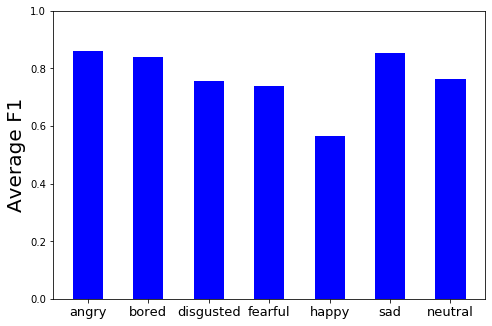

In [90]:
X = np.arange(7)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
width=0.5
line1=ax.bar(X, means, color = 'b', width = width)
emotions=['angry','bored','disgusted','fearful','happy','sad','neutral']
plt.ylim(0,1.0)
plt.xticks(np.arange(0, 1, step=10/6))  # Set label locations.
plt.xticks(X, emotions,rotation=0,fontsize=13)  # Set text labels.
plt.ylabel('Average F1',fontsize=20)
plt.show()
fig.savefig('/scratch/lnw8px/results/all_FCNN/images/emodb_emotion_breakdown.png', bbox_inches='tight', pad_inches=0.27)

In [ ]:
#plot values from literature

#output_file=['/scratch/lnw8px/results/all_FCNN/mag/fft_75/noise_results.txt']
output_file=['/scratch/lnw8px/results/FCNN_results/side_comb_noise/random_noise_results.txt']


noise_df=get_noise_means(output_file[0])

noise_types=noise_df_list[0].index.values
noise_levels=noise_df_list[0].columns.values

x = [35,30,25,20,15,10,5]

values_list=[]
values_list.append(noise_df.loc['means']['inf'])
values_list.append(noise_df.loc['means']['30'])
values_list.append(noise_df.loc['means']['25'])
values_list.append(noise_df.loc['means']['20'])
values_list.append(noise_df.loc['means']['15'])
values_list.append(noise_df.loc['means']['10'])
values_list.append(noise_df.loc['means']['5'])

past_values=[]
past_values.append(0.73)
past_values.append(0.70)
past_values.append(0.63)
past_values.append(0.62)
past_values.append(0.52)
past_values.append(0.45)
past_values.append(0.32)


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, values_list, s=10, c='g', marker=".", label='tuned_att_noise_comb2')
ax1.scatter(x, past_values, s=10, c='r', marker="v", label='W-WPCC')

plt.legend(loc='upper left')
locs, labels = plt.xticks()
plt.xticks(x, noise_levels)
plt.xlabel('Signal to Noise Ratio (dB)',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
fig.savefig('/scratch/lnw8px/results/all_FCNN/images/lit_comparison.png', bbox_inches='tight', pad_inches=0.27)
plt.show()


In [3]:
np.mean(np.array([0.73,0.7,0.63,0.62,0.52,0.45,0.32]))

0.5671428571428572